In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("C:\\Users\\schai\\OneDrive\\Desktop\\Course Project\\2d_dataset.csv")

In [3]:
df.dropna(inplace = True)

In [4]:
del df['Unnamed: 0']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
del df['model_name']

In [7]:
for i in range(len(df)):
#     print(float(df['x_3'][i].split(' ')[0]))
    df['x_3'][i] = float(df['x_3'][i].split(' ')[0])
    df['y_3'][i] = float(df['y_3'][i].split(' ')[0])
    df['y_z'][i] = float(df['y_z'][i].split(' ')[0])
    

C:\Users\schai\AppData\Local\Temp\ipykernel_18172\2734216812.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_3'][i] = float(df['x_3'][i].split(' ')[0])
C:\Users\schai\AppData\Local\Temp\ipykernel_18172\2734216812.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_3'][i] = float(df['y_3'][i].split(' ')[0])
C:\Users\schai\AppData\Local\Temp\ipykernel_18172\2734216812.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df

In [8]:
features = df.loc[:, ['x', 'y']]
features

,x,y
0,0.4942,0.0901
1,0.5219,0.0728
2,0.4711,0.0711
3,0.5450,0.0815
4,0.4527,0.0815
...,...,...
121,0.4319,0.6880
122,0.5751,0.8631
123,0.4088,0.8562
124,0.5566,0.8804


In [9]:
df.columns

Index(['x', 'y', 'x_3', 'y_3', 'y_z'], dtype='object')

In [10]:
outputs = df.loc[:, ['x_3', 'y_3', 'y_z']]
outputs

,x_3,y_3,y_z
0,0.0312,0.7266,0.1537
1,0.0703,0.7578,0.1269
2,0.0,0.7656,0.1289
3,0.1094,0.7578,0.0884
4,-0.0621,0.75,0.469
...,...,...,...
121,-0.125,-0.4453,-0.0131
122,0.1097,-0.7734,0.0156
123,-0.1406,-0.75,-0.0211
124,0.1484,-0.9297,0.1005


In [22]:
x_train, x_test, y_train, y_test = train_test_split(features, outputs, random_state=42)

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping



# Create a Sequential model
model = Sequential()

# Add an input layer with 2 units (input shape: 2)
model.add(Dense(units=2, input_shape=(2,)))

# # Add a hidden layer with 4 units and ReLU activation function
# model.add(Dense(units=6, activation='relu'))

# Add an output layer with 3 units (output shape: 3)
model.add(Dense(units=3))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # You can choose an appropriate loss function and optimizer
model.summary()




Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 3)                 9         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [24]:
import numpy as np

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [25]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

In [26]:
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)


In [27]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)



history = model.fit(x_train, y_train, epochs=250, batch_size=8, validation_split=0.1, callbacks=[early_stopping])  # Adjust batch_size and epochs as needed


Epoch 1/250
11/11 [==============================] - 1s 34ms/step - loss: 0.1053 - val_loss: 0.1561
Epoch 2/250
11/11 [==============================] - 0s 8ms/step - loss: 0.0967 - val_loss: 0.1486
Epoch 3/250
11/11 [==============================] - 0s 7ms/step - loss: 0.0895 - val_loss: 0.1428
Epoch 4/250
11/11 [==============================] - 0s 7ms/step - loss: 0.0840 - val_loss: 0.1390
Epoch 5/250
11/11 [==============================] - 0s 6ms/step - loss: 0.0796 - val_loss: 0.1357
Epoch 6/250
11/11 [==============================] - 0s 8ms/step - loss: 0.0763 - val_loss: 0.1330
Epoch 7/250
11/11 [==============================] - 0s 8ms/step - loss: 0.0734 - val_loss: 0.1307
Epoch 8/250
11/11 [==============================] - 0s 8ms/step - loss: 0.0709 - val_loss: 0.1287
Epoch 9/250
11/11 [==============================] - 0s 7ms/step - loss: 0.0688 - val_loss: 0.1270
Epoch 10/250
11/11 [==============================] - 0s 9ms/step - loss: 0.0668 - val_loss: 0.1250
Epoch 11

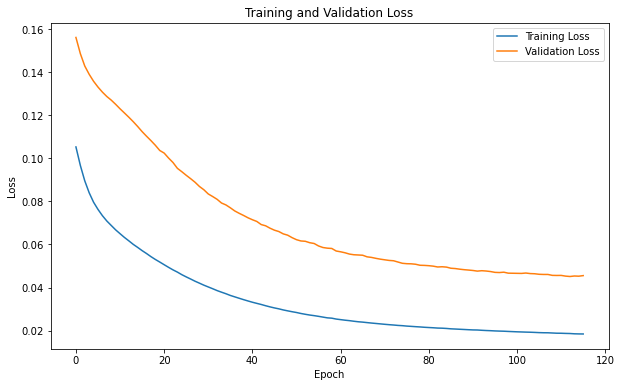

In [28]:
# Plot training and validation errors
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [29]:
predictions = model.predict(x_test)


1/1 [==============================] - 0s 108ms/step


In [31]:
from sklearn.metrics import mean_absolute_error
mse = mean_absolute_error(y_test, predictions)

print("Mean absolute Error:", mse)

Mean absolute Error: 0.13059545


In [112]:
# from sklearn.metrics import mean_absolute_error
# mse = mean_absolute_error(y_test, predictions)

# print("Mean absolute Error:", mse)

In [ ]:
def return_predictions(coordinates_2d):
    coordinates_2d = np.array(coordinates_2d)
    predictions = model.predict(x_test)
    
    return predictions
    
     